# <span style="color:red"> Lezione 8 </span>

### <span style="color:black"> C++ code </span>

* 8.1

L'esercizio è basato sulla programmazione ad oggetti. Tali oggetti sono gli stessi delle lezioni precedenti con qualche modifica per questo problema specifico:
- `funzioni.h`: scrittura, minimo, creazione gen rnd. Da menzionare è la funzione `norm(FunzBase& f, Random& rnd)` che va a scrivere nell'intervallo [-7.5,7.5] i valori di $\Psi_T(x)$ (`Funz.norm`) e di $|\Psi_T(x)|^2$ (`Funz2.norm`);
- `metropolis.h` contiene due metodi che permettono lo studio di $\Psi_T(x)$ (`Algoritm_unif`) e di $|\Psi_T(x)|^2$ (`Algoritm_unif_try`). Con poi `cicleblock_integral` si va a calcolare $\langle {\hat H} \rangle_T$;


* 8.2

L'esercizio riprende 8.1 con l'aggiunta della ricerca dei parametri $\mu$ e $\sigma$ che minimizzano $\langle {\hat H} \rangle_T$. Per trovare i due parametri mi sono avvicinato "a mano" e poi ho studiato un'intervallo con due cicli `for` su $\mu$=[0.8,0.85] e $\sigma$=[0.6,0.65] con salti di 0.01.

* 8.3 

L'esercizio si basa sul codice che è stato fornito, modificato soltanto nel potenziale e le sue derivate, e nella distribuzione di probabilità.

## <span style="color:green"> Esercizio 8.1 </span>

I dati sono caricati dagli output del codice C++, tutti contenuti in `data`, e sono così composti:
* Funz.norm / Funz2.norm:

1° colonna|
----------|
psi/psi^2(x)

dove x va da [-7.5,7.5], quindi nella prima riga le funzioni sono valutate in x=-7.5, nell'ultima in x=7.5 (con salti di 0.05).
* funz_try:

1° colonna|2° colonna|
----------|----------|
distri psi^2|distr psi^2|

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import  auc

X ,Y = np.loadtxt("8.1/data/funz_try.dat", usecols=(0,1), delimiter=' ', unpack='true')
Funz = np.loadtxt("8.1/data/Funz.norm", usecols=(0), delimiter=' ', unpack='true')
Funz2 = np.loadtxt("8.1/data/Funz2.norm", usecols=(0), delimiter=' ', unpack='true')
F = np.linspace(-7.5,7.5,301)

In [5]:
norm = auc(F,Funz)
norm2 = auc(F,Funz2)

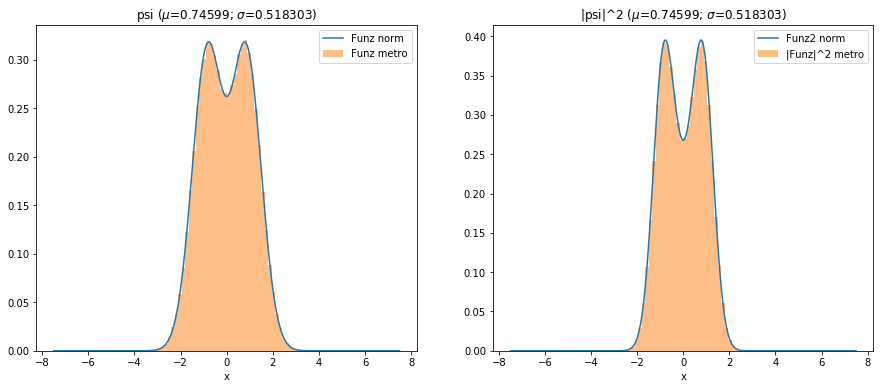

In [32]:
mu = 0.74599
sigma = 0.518303
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,6),gridspec_kw=dict(wspace=0.2, hspace=0.5))
ax[0].plot(F,Funz/norm,label='Funz norm')
ax[0].hist(Y,density=True,alpha=0.5,bins=100,range=(-7.5,7.5), label='Funz metro')
ax[0].set_title(f'psi ($\mu$={mu}; $\sigma$={sigma})')
ax[0].set_xlabel('x')
ax[0].legend()
ax[1].plot(F,Funz2/norm2,label='Funz2 norm')
ax[1].hist(X,density=True,alpha=0.5,bins=100,range=(-7.5,7.5), label='|Funz|^2 metro')
ax[1].set_title(f'|psi|^2 ($\mu$={mu}; $\sigma$={sigma})')
ax[1].set_xlabel('x')
ax[1].legend()

Si possono vedere qui le distribuzioni, date da $\Psi_T(x)$ e da $|\Psi_T(x)|^2$, con:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

opportunamente normalizzate. Infatti quando plottiamo l'istogramma con `density=True` matplotlib gli fornisce un'area unitaria. Per la normalizzazione è stata utilizzata la funzione `sklearn.metrics.auc(x,y)`, che calcola l'area sotto la curva, quindi l'integrale.

## <span style="color:green"> Esercizio 8.2 </span>

I dati sono caricati dagli output del codice C++, tutti contenuti in `data`, e sono gli stessi di 8.1, ai quali si aggiunge:
* output.blk:

1° colonna|2° colonna|
----------|----------|
H_t del blk|incert. H_t blk|



In [7]:
X, Y = np.loadtxt("8.2/data/funz_try.dat", usecols=(0,1), delimiter=' ', unpack='true')
Funz = np.loadtxt("8.2/data/Funz.norm", usecols=(0), delimiter=' ', unpack='true')
Funz2 = np.loadtxt("8.2/data/Funz2.norm", usecols=(0), delimiter=' ', unpack='true')

In [46]:
mu = 0.8
sigma = 0.614
h_value = -0.438573

In [47]:
# norme
norm = auc(F,Funz)
norm2 = auc(F,Funz2)

Ground state energy:  -0.4604658796927149
1st excited state energy:  0.09742471331761227
2nd excited state energy:  1.971733134393021


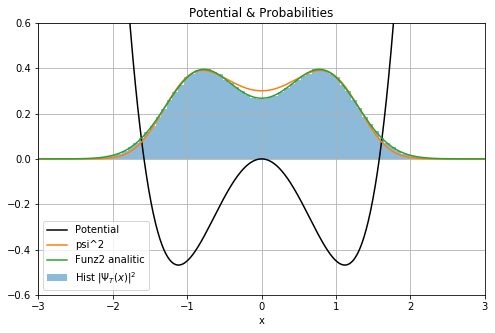

In [48]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.hist(X,density=True,alpha=0.5,bins=200,range=(-7.5,7.5), label=r'Hist $|\Psi_T(x)|^2$')
plt.plot(x,(psi[0])**2,label='psi^2')
plt.plot(F,Funz2/norm2,label='Funz2 analitic')
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

Ora comparo, come già fatto per $|\psi_T(x)|^2$, l'andamento di $\psi_T(x)$ analitico e metropolis. Siccome l'istogramma presenta il comando `density=True`, ha area = 1. Quindi anche la funzione analitica, ha bisogno di essere normalizzata e per farlo è stata usata ancora una volta `auc`.

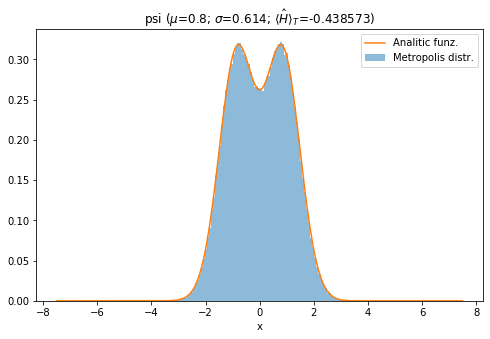

In [52]:
#plotting
plt.figure(figsize=(8,5))
plt.hist(Y,density=True,alpha=0.5, bins=200,range=(-7.5,7.5), label='Metropolis distr.')
plt.plot(F, Funz/norm, label='Analitic funz.')
plt.title(r'psi ($\mu$='+f'{mu}'+r'; $\sigma$='+f'{sigma}'+r'; $\langle {\hat H} \rangle_T$='+f'{h_value}'+')')
plt.xlabel('x')
plt.legend()
plt.show()

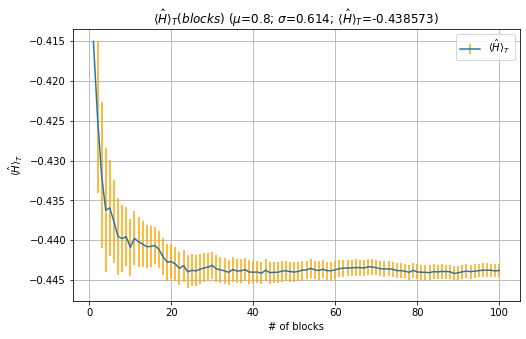

In [54]:
# loading H and its uncertainties
H, err_H = np.loadtxt("8.2/data/output.blk", usecols=(0,1), delimiter=' ', unpack='true')
plt.figure(figsize=(8,5))
b = np.linspace(1,100,100)
plt.errorbar(b, H, yerr=err_H, ecolor='orange', label=r'$\langle {\hat H} \rangle_T$')
#plt.axhline(y=-0.4604658796927149, color='r', alpha=0.3,linestyle='-', label= f'True value')
plt.title(r'$\langle {\hat H} \rangle_T(blocks)$ ($\mu$='+f'{mu}'+r'; $\sigma$='+f'{sigma}'+r'; $\langle {\hat H} \rangle_T$='+f'{h_value}'+')')
plt.xlabel('# of blocks')
plt.ylabel(r'$\langle {\hat H} \rangle_T$ ')
plt.legend()
plt.grid(True)
plt.show()

Ora mostriamo l'andamento progressi di $\langle {\hat H} \rangle_T$ in funzione del numero di blocchi con le loro incertezze. Notiamo che si discosta del valore atteso, ma questo ce lo aspettiamo in quanto stiamo usando una funzione prova con parametri non esatti.

## <span style="color:green"> Esercizio 8.3</span>

Per salvare i file, tutti contenuti nella directory `data`, in modo diverso dopo l'esecuzione sono stati rinominati (in modo da non modificare il codice già presente):
* `probability_PIGS_tau_Cost.dat` ---> $\Psi_T(x)=1$ e $T=0$
* `probability_PIGS_tau.dat` ---> $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ e $T=0$ con il tempo imm che varia (1.2,3,4.5)
* `probability_PIMC_temp.dat` ---> $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ con T che varia (1.25,4,6)


In [1]:
def read(filename):
    x, prob, err_p = np.loadtxt("8.3/data/probability_"+filename+".dat", usecols=(0,1,2), delimiter=' ', unpack='true')
    return x, prob, err_p
names = ['PIGS_4_5_Cost','PIGS_4_5','PIGS_3','PIGS_1_2']

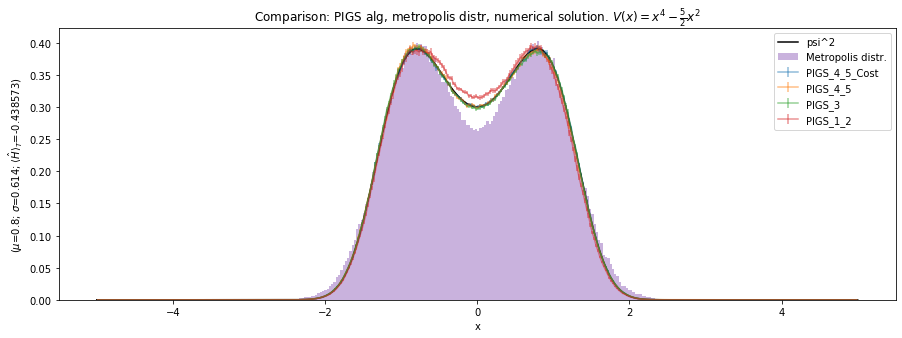

In [55]:
plt.figure(figsize=(15,5))
for i in range(4):
    m, prob, err_p = read(''+names[i])
    #plotting
    plt.errorbar(m, prob, yerr=err_p, alpha=0.5, label=''+names[i])
plt.plot(x,(psi[0])**2,label='psi^2', color='black')
plt.hist(X,density=True,alpha=0.5,bins=200,range=(-3,3),label='Metropolis distr.')
plt.title(r'Comparison: PIGS alg, metropolis distr, numerical solution. $V(x) = x^4 - \frac{5}{2}x^2$')
plt.xlabel('x')
plt.ylabel(r'($\mu$='+f'{mu}'+r'; $\sigma$='+f'{sigma}'+r'; $\langle {\hat H} \rangle_T$='+f'{h_value}'+')')
plt.legend()
plt.show()

Si nota che, anche se diminuiamo il tempo immaginario, gli effetti sono trascurabili. Solo con $\tau=1.25$ si inizia a vedere un discostamento dalla soluzione numerica.

In [40]:
names_T = ['PIMC_1_25','PIMC_4','PIMC_6']

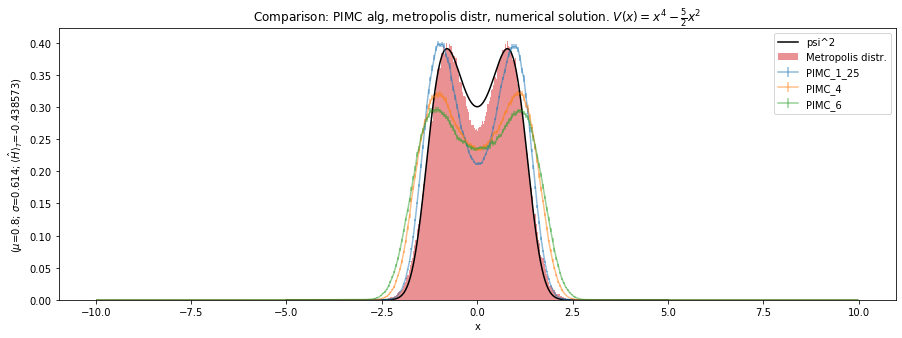

In [56]:
plt.figure(figsize=(15,5))
for i in range(3):
    m, prob, err_p = read(''+names_T[i])
    #plotting
    plt.errorbar(m, prob, yerr=err_p, alpha=0.5, label=''+names_T[i])
plt.plot(x,(psi[0])**2,label='psi^2', color='black')
plt.hist(X,density=True,alpha=0.5,bins=200,range=(-3,3),label='Metropolis distr.')
plt.title(r'Comparison: PIMC alg, metropolis distr, numerical solution. $V(x) = x^4 - \frac{5}{2}x^2$')
plt.xlabel('x')
plt.ylabel(r'($\mu$='+f'{mu}'+r'; $\sigma$='+f'{sigma}'+r'; $\langle {\hat H} \rangle_T$='+f'{h_value}'+')')
plt.legend()
plt.show()

Si nota che, aumentando la temperatura, la porbabilità PIMC_T si allontana sempre più dalla soluzione numerica.